In [1]:
import os
from os import path
from glob import glob
os.chdir('../')
from lib.preprocess_utils import show_img
import cv2
import torch
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


/home/xumj/anaconda3/envs/open-mmlab/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from data.ddsm_data import DdsmData
from torch.utils.data import Dataset, DataLoader

In [3]:
data_dir = '/home/xumj/ddsm_set'
dataset = DdsmData(data_dir,crop_weight=[0.6,0.3,0.1],positive_thr = 0.05,elastic_param=500)

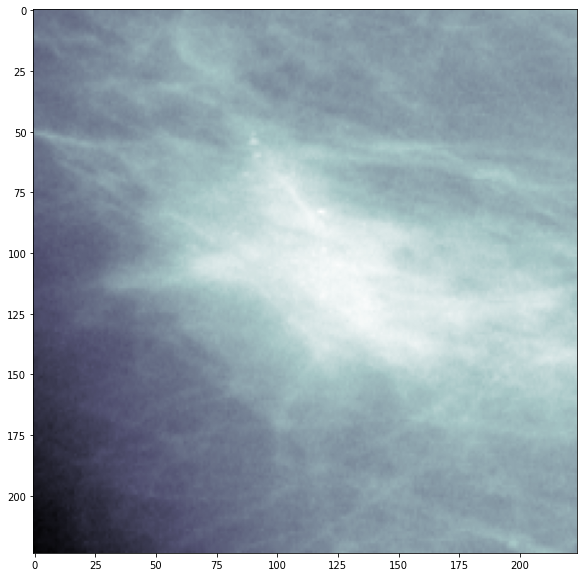

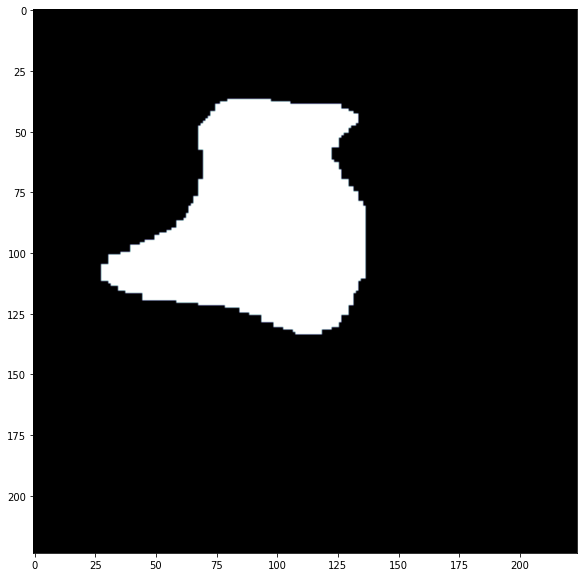

tensor([3], dtype=torch.uint8)


In [5]:
dl = DataLoader(dataset, batch_size=1)
for idx, item in enumerate(dl):
    data_dict = item
    break
show_img(torch.squeeze(data_dict['input']))
show_img(torch.squeeze(data_dict['seg_lesion']))
print(data_dict['pathology'])

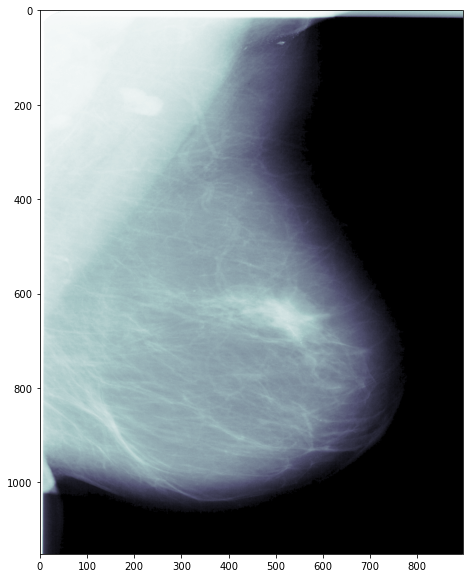

In [5]:
show_img(torch.squeeze(data_dict['img']))

In [9]:
data_dict['img'][0]

tensor([[[65535., 65535., 65535.,  ..., 53205., 53624., 53373.],
         [65535., 65535., 65535.,  ..., 52568., 52559., 52655.],
         [65535., 65535., 65535.,  ..., 51450., 51210., 51519.],
         ...,
         [65535., 65535., 65535.,  ...,     0.,     0.,     0.],
         [65535., 65535., 65535.,  ...,     0.,     0.,     0.],
         [65535., 65535., 65535.,  ...,     0.,     0.,     0.]]])

In [8]:
hist_full

array([[3.36486e+05],
       [0.00000e+00],
       [0.00000e+00],
       ...,
       [9.00000e+00],
       [1.00000e+01],
       [2.20000e+01]], dtype=float32)